In [1]:
import nltk
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize,PorterStemmer
import re
import string
import matplotlib.pyplot as plt

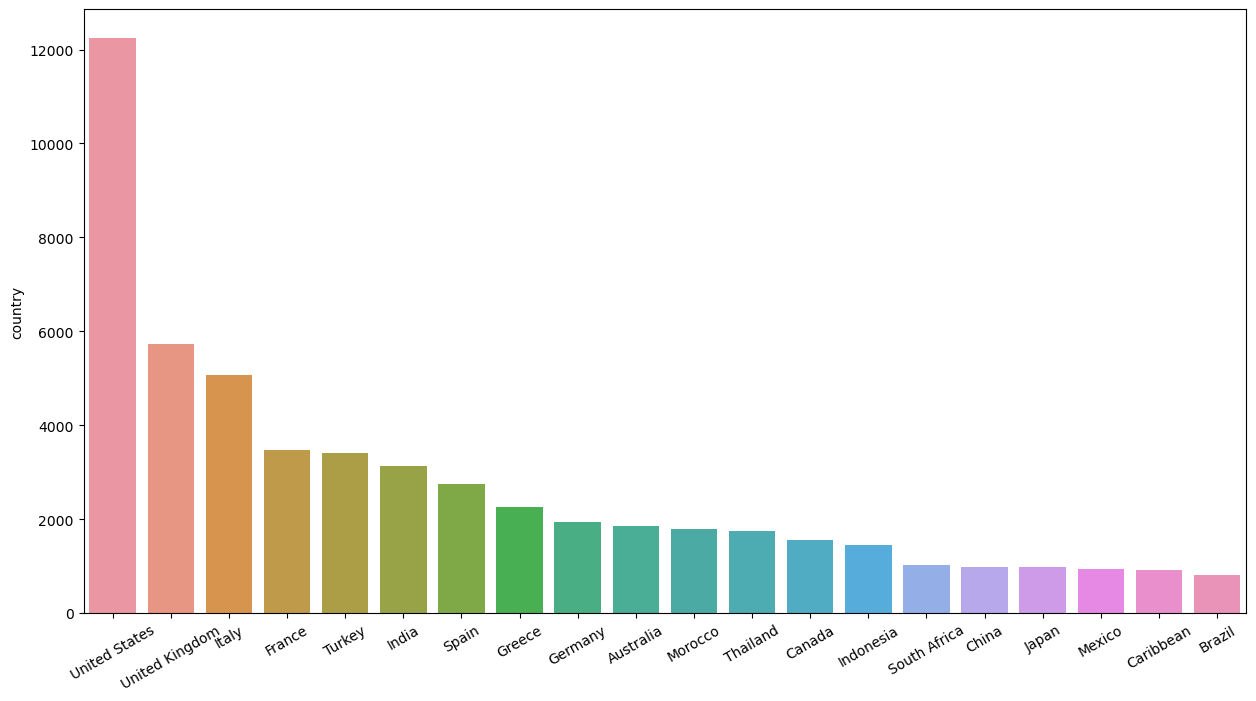

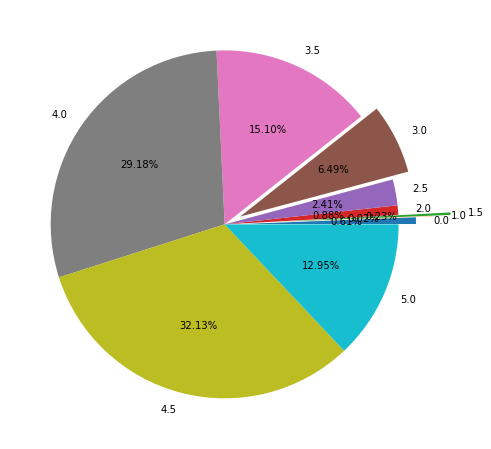


Collage Taksim : 0.9961114769120167
Bika Suites Istanbul Hotel : 0.9959090972635859
The Westist Hotel & Spa : 0.9959070834602063
Nova Plaza Taksim Square : 0.9957011345287281
Tolga Hotel : 0.9954986737307253
Anka Hotel : 0.9954953099894248
Grand Hyatt Goa : 0.9953617784262929
Silent Night Home Stay : 0.9953613149566802
Hotel Fatih Istanbul : 0.9952976724046051
Milport Hotel Levent Istanbul : 0.9952946571953867
Akgun Hotel : 0.9952946571953867
Prima Hotel : 0.9952933984998609
Seven Hills Hotel - Special Category : 0.9952933984998609
Metin Han : 0.9952896105386215
Grand Palace Hotel : 0.9952896105386214
Hotel Maurya Patna : 0.9952773392471057
Hotel & Suites PF : 0.9952640321464823
Lancaster Eden Bay : 0.9952159102670959
Blue Whale Holiday Hotel : 0.9952072410135611


''

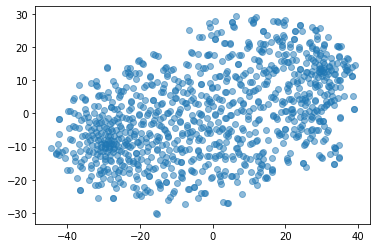

In [2]:
from ipynb.fs.full.Hotels_Recommender import get_recommendation
''

In [3]:
from ipynb.fs.full.Hotels_Recommender import extract_features

## Restaurants Recommender

In [4]:
restaurants = pd.read_csv('../datasets/restaurants_features_dataset.csv')

restaurants.head()


,name,features,cuisines,meals,special meals,official_description,rating,street,country,region,coords,image
0,Lokaal Spaanders,"Reservations,","French, European, Fusion, Street Food, Middle ...","Dinner,",NaN,Onze koks werken met seizoensgebonden groenten...,4.5,Zonneplein 4,The Netherlands,North Holland Province,"{'latitude': '52.41275', 'longitude': '4.89069'}",https://media-cdn.tripadvisor.com/media/photo-...
1,Mediamatic ETEN,"Reservations, Outdoor Seating, Seating, Serves...","European,","Dinner, Breakfast, Lunch, Drinks,","Vegetarian Friendly, Vegan Options,",Plantbased restaurant with a superb waterside ...,4.5,Dijksgracht 6,The Netherlands,North Holland Province,"{'latitude': '52.37637', 'longitude': '4.913192'}",https://media-cdn.tripadvisor.com/media/photo-...
2,Asian Eethuis,NaN,"Asian,",NaN,NaN,NaN,4.5,Admiraal de Ruijterweg 162hs,The Netherlands,North Holland Province,"{'latitude': '52.37436', 'longitude': '4.85875'}",NaN
3,Yumler - CLOSED,"Takeout, Outdoor Seating, Seating, Parking Ava...","International, Asian, Middle Eastern, Healthy,","Drinks, Lunch, Dinner,",NaN,NaN,0.0,Jan evertsestraat 747,The Netherlands,North Holland Province,"{'latitude': '52.369766', 'longitude': '4.8352...",https://media-cdn.tripadvisor.com/media/photo-...
4,Pasta Pasta,"Takeout, Reservations, Seating, Serves Alcohol...","Italian, Pizza, European,","Lunch, Dinner,","Vegetarian Friendly, Vegan Options,",cE5DX19WMlE,3.5,Warmoesstraat 49,The Netherlands,North Holland Province,"{'latitude': '52.375435', 'longitude': '4.8982...",https://media-cdn.tripadvisor.com/media/photo-...


In [5]:
restaurants.shape

(5797, 12)

In [6]:
import json
latitude = []
longitude = []
def append(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    latitude.append(x['latitude']) 
    longitude.append(x['longitude'])
restaurants['coords'].apply(append )
restaurants['latitude'] = latitude
restaurants['longitude'] = longitude
restaurants.head()

,name,features,cuisines,meals,special meals,official_description,rating,street,country,region,coords,image,latitude,longitude
0,Lokaal Spaanders,"Reservations,","French, European, Fusion, Street Food, Middle ...","Dinner,",NaN,Onze koks werken met seizoensgebonden groenten...,4.5,Zonneplein 4,The Netherlands,North Holland Province,"{'latitude': '52.41275', 'longitude': '4.89069'}",https://media-cdn.tripadvisor.com/media/photo-...,52.41275,4.89069
1,Mediamatic ETEN,"Reservations, Outdoor Seating, Seating, Serves...","European,","Dinner, Breakfast, Lunch, Drinks,","Vegetarian Friendly, Vegan Options,",Plantbased restaurant with a superb waterside ...,4.5,Dijksgracht 6,The Netherlands,North Holland Province,"{'latitude': '52.37637', 'longitude': '4.913192'}",https://media-cdn.tripadvisor.com/media/photo-...,52.37637,4.913192
2,Asian Eethuis,NaN,"Asian,",NaN,NaN,NaN,4.5,Admiraal de Ruijterweg 162hs,The Netherlands,North Holland Province,"{'latitude': '52.37436', 'longitude': '4.85875'}",NaN,52.37436,4.85875
3,Yumler - CLOSED,"Takeout, Outdoor Seating, Seating, Parking Ava...","International, Asian, Middle Eastern, Healthy,","Drinks, Lunch, Dinner,",NaN,NaN,0.0,Jan evertsestraat 747,The Netherlands,North Holland Province,"{'latitude': '52.369766', 'longitude': '4.8352...",https://media-cdn.tripadvisor.com/media/photo-...,52.369766,4.835214
4,Pasta Pasta,"Takeout, Reservations, Seating, Serves Alcohol...","Italian, Pizza, European,","Lunch, Dinner,","Vegetarian Friendly, Vegan Options,",cE5DX19WMlE,3.5,Warmoesstraat 49,The Netherlands,North Holland Province,"{'latitude': '52.375435', 'longitude': '4.8982...",https://media-cdn.tripadvisor.com/media/photo-...,52.375435,4.898271


In [7]:
restaurants.isna().sum()

name                       2
features                1453
cuisines                 667
meals                   1275
special meals           3008
official_description    3839
rating                     0
street                    34
country                    0
region                  1554
coords                     0
image                    869
latitude                   0
longitude                  0
dtype: int64

In [8]:
restaurants.shape

(5797, 14)

In [9]:
restaurants['features'] = restaurants['features'].fillna('Seating, Table Service,Reservations')
restaurants['special meals'] = restaurants['special meals'].fillna('')
restaurants['cuisines'] = restaurants['cuisines'].fillna('')
restaurants.head()


,name,features,cuisines,meals,special meals,official_description,rating,street,country,region,coords,image,latitude,longitude
0,Lokaal Spaanders,"Reservations,","French, European, Fusion, Street Food, Middle ...","Dinner,",,Onze koks werken met seizoensgebonden groenten...,4.5,Zonneplein 4,The Netherlands,North Holland Province,"{'latitude': '52.41275', 'longitude': '4.89069'}",https://media-cdn.tripadvisor.com/media/photo-...,52.41275,4.89069
1,Mediamatic ETEN,"Reservations, Outdoor Seating, Seating, Serves...","European,","Dinner, Breakfast, Lunch, Drinks,","Vegetarian Friendly, Vegan Options,",Plantbased restaurant with a superb waterside ...,4.5,Dijksgracht 6,The Netherlands,North Holland Province,"{'latitude': '52.37637', 'longitude': '4.913192'}",https://media-cdn.tripadvisor.com/media/photo-...,52.37637,4.913192
2,Asian Eethuis,"Seating, Table Service,Reservations","Asian,",NaN,,NaN,4.5,Admiraal de Ruijterweg 162hs,The Netherlands,North Holland Province,"{'latitude': '52.37436', 'longitude': '4.85875'}",NaN,52.37436,4.85875
3,Yumler - CLOSED,"Takeout, Outdoor Seating, Seating, Parking Ava...","International, Asian, Middle Eastern, Healthy,","Drinks, Lunch, Dinner,",,NaN,0.0,Jan evertsestraat 747,The Netherlands,North Holland Province,"{'latitude': '52.369766', 'longitude': '4.8352...",https://media-cdn.tripadvisor.com/media/photo-...,52.369766,4.835214
4,Pasta Pasta,"Takeout, Reservations, Seating, Serves Alcohol...","Italian, Pizza, European,","Lunch, Dinner,","Vegetarian Friendly, Vegan Options,",cE5DX19WMlE,3.5,Warmoesstraat 49,The Netherlands,North Holland Province,"{'latitude': '52.375435', 'longitude': '4.8982...",https://media-cdn.tripadvisor.com/media/photo-...,52.375435,4.898271


In [10]:
features = set()
restaurants['features'].apply(lambda x: [features.add(x) for x in str(x).split(',')])
restaurants['special meals'].apply(lambda x: [features.add(x) for x in str(x).split(',')])
restaurants['cuisines'].apply(lambda x: [features.add(x) for x in str(x).split(',')])
features.discard('')
features.discard(' ')
features = {x.strip() for x in features}
features

{'Accepts American Express',
 'Accepts Credit Cards',
 'Accepts Discover',
 'Accepts Mastercard',
 'Accepts Visa',
 'Afghani',
 'African',
 'Albanian',
 'Algerian',
 'American',
 'Arabic',
 'Argentinean',
 'Armenian',
 'Asian',
 'Australian',
 'Austrian',
 'Azerbaijani',
 'BYOB',
 'Balti',
 'Bangladeshi',
 'Bar',
 'Barbecue',
 'Beach',
 'Beer restaurants',
 'Belgian',
 'Brazilian',
 'Brew Pub',
 'British',
 'Buffet',
 'Burmese',
 'Cafe',
 'Campania',
 'Canadian',
 'Caribbean',
 'Cash Only',
 'Catalan',
 'Caucasian',
 'Central American',
 'Central Asian',
 'Central European',
 'Central-Italian',
 'Chilean',
 'Chinese',
 'Colombian',
 'Contemporary',
 'Costa Rican',
 'Croatian',
 'Cuban',
 'Czech',
 'Danish',
 'Deli',
 'Delivery',
 'Digital Payments',
 'Diner',
 'Dining bars',
 'Dog Friendly',
 'Drive Thru',
 'Dutch',
 'Eastern European',
 'Ecuadorean',
 'Egyptian',
 'Emilian',
 'Ethiopian',
 'European',
 'Family style',
 'Fast Food',
 'Filipino',
 'Free Wifi',
 'Free off-street parking'

In [11]:
def extract_features(amenities,features) -> list:
    hotel_features = []
    col_names = pd.Index(features)
    for i,amenity in enumerate(amenities):
        if pd.notna(amenity):
            feats = amenity.split(',')
            row = np.zeros(len(features))
            for feat in feats:
                if feat != '' or feat != pd.isna:
                    ind = np.where(col_names == feat.strip())[0]
                    if len(ind) > 0:
                        index = ind[0] #index
                        row[index] = 1
            hotel_features.append(row)
    return hotel_features


In [12]:
amenities = restaurants['features'].apply(lambda x :x.strip()) + restaurants['special meals'] + ',' + restaurants['cuisines']
amenities = amenities.apply(lambda ament: ament.replace(",,",","))
res_features = extract_features(amenities,features)
amenities

0       Reservations,French, European, Fusion, Street ...
1       Reservations, Outdoor Seating, Seating, Serves...
2             Seating, Table Service,Reservations,Asian, 
3       Takeout, Outdoor Seating, Seating, Parking Ava...
4       Takeout, Reservations, Seating, Serves Alcohol...
                              ...                        
5792                 Seating, Table Service,Reservations,
5793    Delivery, Reservations, Private Dining, Seatin...
5794                                      Seating,Asian, 
5795    Reservations, Seating, Table Service, Serves A...
5796    Seating, Table Service,Reservations,Chinese, D...
Length: 5797, dtype: object

In [13]:
res_features_df = pd.DataFrame(res_features,columns=features)
res_features_df.head()

,Table Service,Latin,Accepts Mastercard,Colombian,Romana,Pub,Peruvian,Buffet,Croatian,Free off-street parking,...,Puerto Rican,Beer restaurants,Persian,Cash Only,Accepts Discover,Fusion,Jazz Bar,Accepts Credit Cards,Cuban,Japanese
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


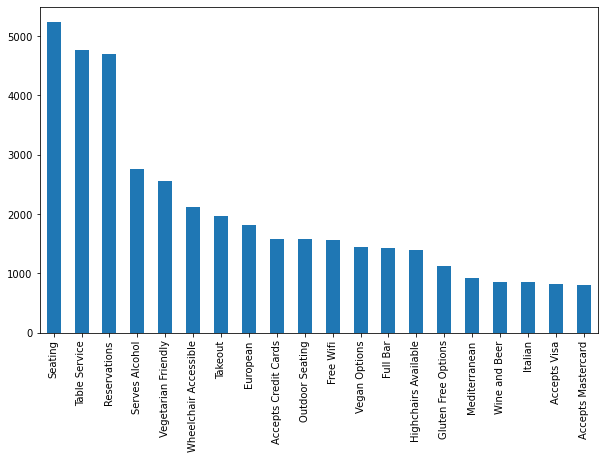

In [14]:
res_features_df.sum().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(10,6))

In [15]:
res_features_df = res_features_df.set_index(restaurants["name"])
res_features_df.sample(20)

,Table Service,Latin,Accepts Mastercard,Colombian,Romana,Pub,Peruvian,Buffet,Croatian,Free off-street parking,...,Puerto Rican,Beer restaurants,Persian,Cash Only,Accepts Discover,Fusion,Jazz Bar,Accepts Credit Cards,Cuban,Japanese
name,,,,,,,,,,,,,,,,,,,,,
Restaurante Xix Kebab,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Forschungsbrauerei,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Grocery Cafe Restaurant,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Savor,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yi Cafe at Pudong Shangri-La,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Cafe Odessa,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Les Foudres - CLOSED,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
St. Vincent's University Hospital,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHEZ THOMAS,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### KNN Recommender

In [16]:
from sklearn.neighbors import NearestNeighbors

In [17]:
knn = NearestNeighbors(n_neighbors=10, metric='cosine')

In [18]:
knn.fit(res_features_df)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [19]:
distances, indecies = knn.kneighbors(res_features_df)

In [20]:
indexes = np.random.permutation(len(res_features_df)//4)
for index in indexes :
    get_recommendation(res_features_df.iloc[index].name,indecies,distances,res_features_df,restaurants)
    print('------------')

Cafe Juicy : 0.9999999999999999
Shakespeare and Co. Burjuman : 0.9128709291752769
Shakespeare and Co. Bawabat Al Sharq : 0.9128709291752769
Spianataandco : 0.8944271909999159
Klubokawiarnia Grochownia : 0.8944271909999159
Cafe Jehuda : 0.8944271909999159
Cafe Breslau fuego : 0.8944271909999159
Madame Salade AZCA : 0.8944271909999159
Le Pret a Manger Jonction : 0.8944271909999159
------------
Motor Cafe : 1.0
Bartini : 1.0
i-Cafe : 1.0
Ginger bar : 1.0
Harolds Cafe : 1.0
Sadaharu Aoki : 1.0
Tomtebo Art Cafe : 1.0
Maison Drap : 1.0
Karvana - CLOSED : 1.0
------------
Wahaca Charlotte St : 0.8432740427115681
Bella Italia : 0.8207826816681228
Olivia Aker Brygge : 0.8134892168199603
La Forchetta : 0.8104432008587534
Restaurant Ilios : 0.8049844718999243
Conchiglia : 0.7926290870042666
Dote Barata Salgueiro : 0.7926290870042666
Dig In : 0.7926290870042666
Abibayio : 0.7807200583588264
------------
The Oiler Bar : 0.7071067811865475
The Assembly House : 0.6708203932499369
The Chanter : 0.6708

Tworzywo : 1.0
Caruzello by Dylan : 1.0
Ravintola Factory Tali : 1.0
Brasserie Beaulieu : 1.0
------------
Forn de Pa Artesa Miralles : 0.9128709291752769
La Catedral de la Tapa : 0.8164965809277261
Klubokawiarnia Grochownia : 0.8164965809277261
El Aperitivo del Corazon : 0.8164965809277261
La Encantada Reina de Cuba : 0.8164965809277261
Casa Vicenta : 0.8164965809277261
Cafeteria Bahia Blanca : 0.8164965809277261
Cerveceria Cucos : 0.8164965809277261
DCU Ryan Academy : 0.8164965809277261
------------
Il Forno : 1.0
Ristorante Alghero : 1.0
Italiano Vero : 1.0
Cemelli - CLOSED : 1.0
Gianni Ristorante Budapest - CLOSED : 1.0
Trattoria Da Pindinello : 1.0
Trattoria boccio : 1.0
Pic-A-Deli : 1.0
Corners Pub : 1.0
------------
Domaine de Chouchene : 0.9999999999999999
La Rosace : 0.9999999999999999
El Habre : 0.9999999999999999
Lounge V120 : 0.9999999999999999
Sea Sweet : 0.9999999999999999
Shakespeare and Co Baghdad : 0.9128709291752769
Azkadenya Baghdad : 0.9128709291752769
PIAZZA : 0.89

Trattoria Due : 0.8888888888888886
Tapitas : 0.8888888888888886
Melina Merkouri : 0.8888888888888886
Gusto Trattoria : 0.8888888888888886
Casco Viejo : 0.8888888888888886
Linde : 0.8888888888888886
Liosporos : 0.8660254037844388
Nea Knosso : 0.8660254037844388
------------
Saigon - Green : 0.9198662110078001
Huynh Restaurant : 0.8703882797784892
Against The Grain : 0.8581163303210333
Viet Soho : 0.8528028654224417
Restaurant Tai Thu : 0.8528028654224417
Hakii Belair : 0.836242010007091
Restaurant Vietnam : 0.836242010007091
HX46 : 0.8058229640253802
Xich Lo Restaurant : 0.8040302522073697
------------
ZMAUC : 0.8888888888888886
Zeleneho Stromu : 0.8819171036881966
Jak's Bar : 0.8819171036881966
Tin Pan Alley : 0.8819171036881966
Les Brasseurs : 0.8819171036881966
Restaurace U Kotvy : 0.8432740427115678
The Funky Monkey : 0.8249579113843054
Le Fiacre : 0.8249579113843054
Restaurace U Regenta : 0.8249579113843054
------------
Hereford Village : 0.8249579113843054
Asador Imanol Felipe II 

Beerzone Kaleici : 0.816496580927726
Cafe Peros or Peros Cafe : 0.7745966692414835
La Boucherie Restaurant : 0.7745966692414835
------------
Nigin : 0.8703882797784892
La Pace : 0.8703882797784892
Mount Everest Vilhola : 0.8581163303210333
Milano Liffey Valley : 0.8581163303210333
Against The Grain : 0.8581163303210333
AL Dabke : 0.8563488385776753
Kin Khao : 0.836242010007091
Copper Chimney Restaurant : 0.836242010007091
Yas Restaurant : 0.836242010007091
------------
Nyhavns Hereford House : 0.9045340337332909
Restaurant Schonnemann : 0.8819171036881966
Gemyse : 0.8660254037844388
Ravage Restaurant Copenhagen : 0.8320502943378436
Lumskebugten : 0.8320502943378436
Summerstage : 0.816496580927726
Le Delecta : 0.816496580927726
Ravintola Messenius : 0.816496580927726
Tivoli Hallen : 0.7777777777777776
------------
Bramm : 1.0
Eat smart : 0.9128709291752769
Alchemy : 0.9128709291752769
Miss Waffle Basilix : 0.9128709291752769
Einde Van de Wereld : 0.9128709291752769
La Maison : 0.9128709

Jedalen U Danovaka 1 : 0.9999999999999999
BistrOne : 0.9999999999999999
U-Zlateho-Vodnika : 0.9999999999999999
Altstadt : 0.9128709291752769
Artkitchen : 0.9128709291752769
Gostilna Pekel : 0.9128709291752769
Caruzello by Dylan : 0.8944271909999159
------------
Tantarantan : 0.8749999999999999
La Torrada de Cristofol : 0.8660254037844387
Catamaran : 0.8249579113843054
L'Asino che Vola : 0.801783725737273
Bar Casa Florencio : 0.7905694150420948
Kiosco Moderno : 0.7905694150420948
DesTapa'T : 0.7905694150420948
Muleke Bar : 0.7905694150420948
Restaurante O'Rosal : 0.7905694150420948
------------
LaSalle : 0.8894991799933215
The Southern : 0.8894991799933215
The Greenhouse : 0.8864052604279182
The Alchemist Gastropub : 0.8819171036881969
Barrel House Bar and Grill : 0.868599036215379
King's Wark : 0.868599036215379
The Booking Office : 0.868599036215379
Le Madeleine 7 : 0.868599036215379
The White House : 0.8583950752789523
------------
Krakowskie Metro : 0.7938841860374445
Miss Pizza Eur

Salon Wechsel Dich : 0.7606388292556648
Cafe Berlinka SNG : 0.7590721152765897
------------
Le Delecta : 0.816496580927726
Summerstage : 0.816496580927726
The Butcher Grill : 0.7777777777777776
Le Fair Play : 0.7559289460184543
Zdybanka : 0.7559289460184543
Salon 39 : 0.7559289460184543
Jimmy's : 0.7559289460184543
Vinoteca : 0.7559289460184543
Steak City : 0.7453559924999298
------------
Roadhouse Grill : 0.7302967433402215
Cafe Trocadero : 0.7302967433402215
Sphinx : 0.7302967433402215
Hukodden Strandrestaurant : 0.7071067811865477
Halal Fried Chicken de Vlugtlaan : 0.7071067811865477
Det gronne kjokken : 0.7071067811865477
Milenium Cafe : 0.7071067811865477
The Donut Library : 0.6666666666666669
Restaurang Retro Wenner-Gren Center : 0.6666666666666669
------------
Jin Cheng : 1.0
Restaurant China : 0.8660254037844388
Cheng Long : 0.8660254037844388
Cinska Restaurace Na Ul. U Santosky : 0.8660254037844388
175 Deno Tantan Men Ginza : 0.816496580927726
Sakura : 0.7745966692414835
fulih

IO Godfrey : 0.7627700713964738
Restaurant Don Weber : 0.7557421816064581
Lucky Bird : 0.7537783614444088
The Hamburger Foundation - THF Paquis : 0.7537783614444088
Flamender Restaurant Polus City Center : 0.7443873683187765
Georgian House Restaurant : 0.7336739820667776
------------
Qadoury Restaurant : 1.0
Oscar's Restaurant : 1.0
Binis am Viktualienmarkt : 1.0
Sala : 0.7071067811865475
Subway : 0.7071067811865475
Wasabi Sushi : 0.7071067811865475
Farggi : 0.7071067811865475
La Revuelta : 0.7071067811865475
Cafe Alegria : 0.7071067811865475
------------
CASA MIA : 1.0
Cose buone : 0.8660254037844388
Mondo Pizza : 0.8660254037844388
Pizza Pat : 0.816496580927726
La Piazza : 0.816496580927726
Da Curio Pizza : 0.7745966692414835
Pizzeria Luigi : 0.7745966692414835
Come Una Volta : 0.7745966692414835
Tonton pizza : 0.7745966692414835
------------
Chinatown Restaurant : 0.9428090415820634
Fu Hao : 0.9428090415820634
Shanghai : 0.9428090415820634
Lian Pu Oriental Express Restaurant : 0.942

Feuille de Banane : 0.8040302522073697
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Miki Ramen : 0.9045340337332909
Hong Hoa : 0.8888888888888886
Xich Lo Restaurant : 0.8888888888888886
Sabores do Sebouh : 0.8888888888888886
Annapurna : 0.8888888888888886
Chandni : 0.8888888888888886
Nepal Haus : 0.8888888888888886
Kobal : 0.8888888888888886
Tout Simplement : 0.8888888888888886
------------
7 Food Sins Gastro Pub : 0.8111071056538128
L'Escamarla Restaurant : 0.7960979398444399
The Hamburger Foundation - THF Paquis : 0.7570332986102253
Egon Karl Johan : 0.7509392614826382
9 Nine : 0.7492686492653552
Fish Home AhhirkapI restaurant : 0.7492686492653552
The Cock : 0.7456011350793256
Dukkan : 0.7368421052631575
Le Perron : 0.7357672073819591
------------
Conchiglia : 0.8446530265013356
Piu : 0.8374357893586235
AmaMi Ris

Marblau - CLOSED : 0.7071067811865475
Les Baguettes de Bambou : 0.7071067811865475
Crussh : 0.7071067811865475
Zur Deutschen Sudsee Insel : 0.7071067811865475
Empire Cafe : 0.7071067811865475
Thang Nguyen Huu : 0.7071067811865475
Ravintola Blancco Pasila : 0.7071067811865475
------------
Casa Vicenta : 1.0
Taberna La Percha : 1.0
Vivid Tapas Bar : 1.0
La Encantada Reina de Cuba : 1.0
Bacalalo : 1.0
Rte. Tarrida : 1.0
Cerveceria Cucos : 1.0
La Catedral de la Tapa : 1.0
Bonissim : 1.0
------------
Non La : 0.8944271909999159
Lang Van : 0.8164965809277261
Zamigo : 0.8164965809277261
Nouveau Hong Kong : 0.8164965809277261
La Pagode : 0.7559289460184544
Hoang-Hai : 0.7559289460184544
Mot Hai Ba Viet Nam : 0.7559289460184544
Viet Siam : 0.7559289460184544
Les Baguettes de Bambou : 0.75
------------
Twisted Street Kitchen : 1.0
Khanittha Im Werksviertel : 0.9258200997725515
Thai O'Cha : 0.8660254037844387
Thai Asien Take Away : 0.8660254037844387
Thaiwok : 0.8333333333333336
Reformhaus Buchmu

Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
mitsu cafe - CLOSED : 0.8944271909999159
Gyosai - Sushi : 0.8944271909999159
Restaurant Aya Helsinki : 0.8944271909999159
Fuku Sushi : 0.7999999999999999
Sushi-Bar Ginza : 0.7999999999999999
Thaiaway : 0.7745966692414835
Sushiya : 0.7745966692414835
Japon Sushi : 0.7745966692414835
Japo Sushi Skoeyen : 0.7302967433402215
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Brios Kavezo : 0.8651809126974004
Mochaland Cafe : 0.8651809126974004
Salt Cafe : 0.8520128672302582
Umami Matcha Cafe : 0.8333333333333336
Salutorget : 0.8333333333333336
Wahaca Charlotte St : 0.8333333333333336
The Coffee Mill Cafe : 0.8249579113843053
Cafe Italia : 0.8229511997

Restauracja kawiarnia europejska : 0.7833494518006403
Malostranske hospudky U Tri Zvonku : 0.7833494518006403
Barbakan Restauracja : 0.778498944161523
Restaurant Neffes : 0.762770071396474
Marina Restaurant : 0.7526178090063819
Zum Schinakl : 0.7526178090063819
Bajai Halaszcsarda : 0.7526178090063819
Smak Ukrainski : 0.7526178090063819
Restaurant Um Dierfgen : 0.7462025072446364
------------
Bratislavske Langose : 0.8944271909999159
Burger Bite : 0.7559289460184544
Quick : 0.75
Wiggo : 0.75
Basburek Ljubljana - CLOSED : 0.75
Smichovske uzeniny Kratochvil : 0.75
Omaya Ice Cream : 0.75
New Food Concept : 0.75
Minute Fast Food : 0.75
------------
Mychef Self Service : 0.9258200997725515
La Piadineria : 0.9258200997725515
Duran Szendvics : 0.8571428571428569
I Fritti de Sora Milvia : 0.8571428571428569
McDonald's : 0.8451542547285164
Subway : 0.8451542547285164
Subway : 0.8451542547285164
Subway : 0.8451542547285164
Yum...Me : 0.801783725737273
------------
L'Escargot Bleu Restaurant : 0.8

Pivnica u Kozla : 0.8153742483272114
Sky Dome Bar : 0.8058229640253802
Dandelion : 0.8017837257372733
Slovak Pub : 0.801783725737273
U Magistra Kelly : 0.7778444682625972
Barrock : 0.7715167498104595
Restaurace Cerny Orel : 0.7715167498104595
Bar Restaurant Karlova 30 : 0.7715167498104595
Mind the Gap : 0.7606388292556648
------------
Rosso Citykaytava : 1.0
Pizzeria Al Kabbas : 0.8944271909999159
Mama Pizza Zentrum : 0.8944271909999159
Pizza Express : 0.8944271909999159
Pizza Hut Fremicourt : 0.8944271909999159
Pizzeria Corner : 0.8944271909999159
Pizzeria Arabella : 0.8944271909999159
Piccolo Ristorante - Pizzeria : 0.8944271909999159
La Festa Restaurante Pizzeria : 0.8944271909999159
------------
Pause Cafe : 0.816496580927726
Osada 2000 : 0.816496580927726
Grillhaus Zov Homolja : 0.816496580927726
Kontulan Kebab Pizza Grilli : 0.816496580927726
Vulkan : 0.816496580927726
Akacfa Sorozo by Kakas : 0.816496580927726
Bar Vogue : 0.816496580927726
Sounds Jazz Club : 0.7559289460184543
G

The Greenhouse : 0.7462025072446364
------------
Gran Torino Pizza : 0.9999999999999997
Scala : 0.9486832980505138
Pizzeria Grado : 0.9486832980505138
Eiscafe Pinocchio : 0.9486832980505138
Pizzeria Buona Sera : 0.9486832980505138
Pommodoro : 0.9486832980505138
Angoletto : 0.9486832980505138
Quattro Fontane Italiensk Restaurant : 0.9486832980505138
Pasta Pasta : 0.9486832980505138
------------
Debi's Kitchen : 0.816496580927726
Govinda : 0.7715167498104596
Mammouth : 0.7715167498104596
Rusconi : 0.7715167498104596
Dai Pai : 0.7216878364870323
El Patron : 0.7216878364870323
Nah am Wasser gebaut : 0.7216878364870323
Gelataus : 0.7071067811865477
Bubbleology : 0.7071067811865477
------------
Eleszto Craft Beer Bar : 0.7378647873726218
The Dog's Bollocks - CLOSED : 0.7071067811865475
Baza : 0.7035264706814485
Il Sogno : 0.6882472016116853
Kavanaghs Temple Pub : 0.6735753140545635
Bar Trojkat : 0.6735753140545635
Neary's : 0.6735753140545635
Panini Durini : 0.6666666666666666
German Beergar

Tivoli Hallen : 0.8432740427115678
Broodje van Popov : 0.8366600265340755
Plenum : 0.8366600265340755
Salon Wechsel Dich : 0.7999999999999999
Ristorante Salentino : 0.7826237921249264
Cafe Mistral : 0.7826237921249264
Kleines Schutzhaus Rosental : 0.7826237921249264
Cafe Panini : 0.7826237921249264
Nascherei : 0.7826237921249264
------------
Amber Indian Restaurant : 0.8807048459279794
Nam Nam : 0.8807048459279794
Yogi Haus : 0.8770580193070291
Samrat : 0.8461538461538465
Kripa : 0.8461538461538465
Kobal : 0.8320502943378436
Chandni : 0.8320502943378436
Spicey Kitchen : 0.8320502943378436
Aaina Tempelhof : 0.8320502943378436
------------
East Restaurant : 0.8970852271450606
Mendi : 0.8894991799933215
Indian By Nature II : 0.868599036215379
Salaam Bombay : 0.868599036215379
Sawasdee Thai Etterem : 0.8486684247915054
Benares Indisk Restaurant : 0.8426648406178137
O Sopinhas : 0.8280786712108251
Wagamama : 0.8280786712108251
Serendib : 0.8280786712108251
------------
Bors GasztroBar : 0.7

Faraon : 0.7999999999999999
Leeman Doner : 0.7999999999999999
Kosem : 0.7453559924999298
Aspendos Bar And Grill : 0.7453559924999298
Kebab Klubben : 0.7453559924999298
Lavanta Traiteur : 0.7302967433402215
Sofra Turkische Esskultur : 0.7302967433402215
Antalya : 0.6761234037828131
Kapadokya : 0.6761234037828131
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
9 Nine : 0.8333333333333331
Restaurant Ilios : 0.816496580927726
L'Oste e La Civetta : 0.7960979398444399
Kiosko Universal : 0.7960979398444399
Ristorante Soho Milano : 0.7905694150420951
Tapas Huset Casa Lola : 0.7856742013183865
Restaurant Pastis : 0.7833494518006402
Ristorante Pizzeria S. Martino Prestige : 0.7759402897989857
La Pasion Restaurant : 0.7756717518813397
------------
Pause Cafe : 1.0
Cafe Alegria : 0.816496580927726
Tap East : 0.7745966692414835
Do

Thang Nguyen Huu : 0.8944271909999159
------------
FMR Downtown : 0.9486832980505138
Swiss House : 0.8888888888888886
Doris' Diner : 0.8888888888888886
Dionysos : 0.8888888888888886
Gourmet Burger Kitchen : 0.8660254037844388
Billy the Butcher : 0.8432740427115678
Against The Grain : 0.8432740427115678
Big Fernand Lyon : 0.8432740427115678
Mon Liban : 0.8432740427115678
------------
Leonardo : 0.7819290527140306
Restaurant Muru : 0.7660323462854264
Juuri : 0.7660323462854264
Altroke : 0.7654655446197433
Mercado : 0.7637626158259736
Biala Roza : 0.7500000000000001
The Cock : 0.75
Ecco Vino : 0.7456011350793256
Marktkuche : 0.7456011350793256
------------
Casa Vicenta : 1.0
Taberna La Percha : 1.0
Vivid Tapas Bar : 1.0
La Encantada Reina de Cuba : 1.0
Bacalalo : 1.0
Rte. Tarrida : 1.0
Cerveceria Cucos : 1.0
La Catedral de la Tapa : 1.0
Bonissim : 1.0
------------
Restaurant Um Dierfgen : 0.8749999999999999
Hereford Village : 0.8749999999999999
Ravintola Makasiini : 0.8249579113843054
Gri

Ame et Saveurs : 0.6917144638660745
Krampus : 0.6784005252999683
O's Pasta : 0.6784005252999683
Pizzerija Trta : 0.6784005252999683
Celestina alla Camilluccia : 0.674199862463242
Pizzeria La Fiorita : 0.6689936080056728
Borromeo Restaurant By Eataly : 0.6581451817144176
------------
Xenios Zeus : 0.8908708063747482
Restaurant Ilios : 0.8573214099741123
Abibayio : 0.8463272660560108
Come a la Maison - Italian BeautyFood : 0.8339078479367936
Tapas Huset Casa Lola : 0.8249579113843059
Oinopoleion : 0.8215838362577496
Trilogie : 0.8215838362577496
Conchiglia : 0.808693704220811
Leonardo : 0.808693704220811
------------
Paneolio : 0.8181818181818183
Tapas Brindisa Soho : 0.8058229640253802
Restaurant Picasso : 0.8043996665398437
Olio Pane Vino : 0.8040302522073697
Bistro Baret : 0.8040302522073697
Arco Da Velha : 0.8040302522073697
Fig Tree Bistro : 0.8040302522073697
The House : 0.7833494518006403
La Cucina : 0.7833494518006403
------------
Skordopisti : 1.0
1935 Mezedopoleio : 1.0
Aphrodi

Separe : 0.801783725737273
------------
Cafe Francais : 0.8058229640253802
Cote Brasserie : 0.8058229640253802
Flambeeria : 0.8058229640253802
Wildberry Pancakes and Cafe : 0.7833494518006403
Charlotte Menora : 0.7833494518006403
Gourmet Burger Kitchen : 0.7833494518006403
Kriti : 0.778498944161523
Cafe Gratitude : 0.778498944161523
Alfiemoons : 0.778498944161523
------------
Wahaca Charlotte St : 0.8432740427115681
Hungarikum Bisztro : 0.8385254915624214
The Cock : 0.8385254915624214
Francesco Cafe : 0.8366600265340755
Magdalena Merlo Restaurant : 0.8366600265340755
Svejk Restaurant U Karla : 0.8134892168199603
Olivia Aker Brygge : 0.8134892168199603
Dolnozemska Krcma : 0.8104432008587534
Restaurant a Bar Klid Po Praci : 0.8062257748298551
------------
Restaurant Vietnam : 0.9230769230769235
Chay Village : 0.9198662110078001
BAO Vietnamese Cooking : 0.8807048459279794
Amber Indian Restaurant : 0.8807048459279794
Against The Grain : 0.8770580193070291
Kin Khao : 0.8461538461538465
Pizz

Sabores do Sebouh : 0.8432740427115678
Haretna Restaurant : 0.8432740427115678
Del Favero : 0.8432740427115678
Bab Al Hara : 0.8366600265340755
Phenicia : 0.8215838362577492
Grill Land : 0.8215838362577492
------------
Vinello a Milano : 0.7590721152765897
le jardin des dombes : 0.7453559924999299
Papierovy Mesiac : 0.7348469228349533
La Chelinda : 0.7324670207647146
100 Montaditos : 0.7161148740394329
The Mexican : 0.7161148740394329
Ta Koutalakia : 0.7161148740394329
Presto Pizza Cedofeita : 0.7108186533109108
Cafe Weingartner : 0.7006490497453707
------------
Base Wood Fired Pizza : 0.8749999999999999
Pizza Fantasy 3 : 0.8660254037844387
Pizza Royal : 0.8660254037844387
La Piadineria : 0.8660254037844387
Vapiano - Becsi utca : 0.8528028654224417
Pizza Florida : 0.8164965809277261
Rusconi : 0.801783725737273
Back Werk : 0.801783725737273
La Focaccia : 0.801783725737273
------------
Marktkuche : 0.7894736842105259
Casa Lalla Restaurant : 0.7570332986102253
The Game Downtown : 0.750939

Subway : 0.6793662204867577
The Rush Hour : 0.6726727939963125
Wok to Walk : 0.6689936080056728
Red face : 0.6689936080056728
Lucky Dumpling : 0.6671243849949912
Warie's Thai Food : 0.6671243849949912
Bellozzo Oktogon : 0.6537204504606134
------------
Be Thai Style Thai Restaurant : 0.8111071056538128
Nanyang : 0.8040302522073693
Tomo Sushi : 0.7698003589195009
Kantipur : 0.7660323462854264
Art Wok Cafe : 0.7660323462854264
Loon Fung Restaurant : 0.7559289460184545
Green Buddha : 0.754247233265651
BAO Vietnamese Cooking : 0.7484551991837491
Apsorn Thai Restaurant : 0.7484551991837491
------------
McDonald's : 1.0
McDonald's Amsterdam Muntplein : 1.0
Sunset Boulevard : 1.0
Subway : 0.8944271909999159
McDonald's : 0.8944271909999159
KFC : 0.8944271909999159
Subway : 0.8944271909999159
KFC - Edinburgh Craigleith : 0.8944271909999159
Subway : 0.8944271909999159
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeeroste

Restaurant Sankt Annae : 0.9045340337332909
Ravage Restaurant Copenhagen : 0.836242010007091
Le Caracoya : 0.8040302522073697
Golden Hits : 0.8040302522073697
Restaurant Schonnemann : 0.7977240352174656
Salon 39 : 0.7977240352174656
Gemyse : 0.7833494518006403
Restaurant U Formel : 0.7833494518006403
Restaurant Neffes : 0.762770071396474
------------
La Lluna de Mel : 0.7142857142857141
Tolteca Mexican Style Grill : 0.7142857142857141
Rodilla : 0.7142857142857141
Burrito Joe : 0.6761234037828131
El Patron : 0.6681531047810608
Panaria : 0.6681531047810608
SAM Zoliborz : 0.6546536707079772
Gelataus : 0.6546536707079772
Los Mexikas : 0.6299407883487119
------------
Coffee Room : 1.0
Aurora : 1.0
HHuxleys : 1.0
Eat : 1.0
Brasa London : 0.8944271909999159
Sitooterie : 0.8944271909999159
The Boards : 0.8944271909999159
Wurttemberger Weinhaus Berlin - CLOSED : 0.8660254037844388
Pizza restaurant Slimak : 0.8660254037844388
------------
Domaine de Chouchene : 0.9999999999999999
La Rosace : 0.9

Bar Rassell : 0.9045340337332909
Madrid : 0.9045340337332909
Dionisios : 0.8703882797784892
Invers : 0.8581163303210333
Atrium Greek Bistrot Restaurant : 0.8581163303210333
Kanbei Urban Food : 0.8581163303210333
Mykonos Sendling : 0.8581163303210333
Restaurante L'Ham : 0.8528028654224417
La Buena Vida : 0.8528028654224417
------------
Al Argentino Steakhouse - Restaurant : 0.8249579113843054
El Barrio de Angel : 0.7777777777777776
Ojo de Agua : 0.7559289460184543
Gauchos : 0.7396002616336388
Cafe Buenos Aires na Fabrica : 0.7071067811865475
Chimarrao : 0.7071067811865475
The Meat Co. : 0.6885303726590963
KILO-GRAMMO : 0.6885303726590963
Cafe du Signal : 0.6804138174397717
------------
Thai Express : 1.0
Phat Thai Food : 1.0
Sansab : 1.0
Thai House Wok : 1.0
THEVA : 1.0
Thai Heaven : 1.0
Vanilla omlette : 1.0
Tamarindo Deli : 0.8944271909999159
Panorama Family : 0.8660254037844388
------------
Skordopisti : 1.0
1935 Mezedopoleio : 1.0
Aphrodite : 1.0
Concierge Athens Cafe : 1.0
Kourdist

Yum...Me : 0.8749999999999999
Pizza Avanti : 0.8660254037844387
Papa John's : 0.8660254037844387
Pizza Fantasy 3 : 0.8660254037844387
Pizza Huset : 0.801783725737273
Alice Pizza - Via Flavia 91 : 0.801783725737273
Da Curio Pizza : 0.7905694150420948
Come Una Volta : 0.7905694150420948
WORLD OF PIZZA Berlin-Mitte : 0.7826237921249264
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Barrel House Bar and Grill : 0.802955068546966
37 Dawson Street : 0.7970811413304557
Barrio Shoreditch : 0.7894736842105259
The Blues Kitchen - Brixton : 0.7894736842105259
Dukkan : 0.7894736842105259
Collage : 0.7789808377045201
L'Escargot Blanc Restaurant : 0.7789808377045201
Olivia Aker Brygge : 0.7789808377045201
Krak'n Town : 0.7694837640638652
------------
Alta Marea : 0.9486832980505138
Giacomo : 0.9486832980505138
Vincenzo's : 0.94868

Ravage Restaurant Copenhagen : 0.8807048459279794
Ravintola Aino : 0.8486684247915054
BOB Biomio Organic Bistro : 0.840168050416806
Kodbyens Fiskebar : 0.840168050416806
Usquabae : 0.8333333333333336
Cafe de Paris : 0.8215838362577492
Relae : 0.8198915917499229
Restaurant Karla : 0.8164965809277264
Lumskebugten : 0.8006407690254358
------------
Skordopisti : 1.0
1935 Mezedopoleio : 1.0
Aphrodite : 1.0
Concierge Athens Cafe : 1.0
Kourdistiri - CLOSED : 1.0
Olive Tree Restaurant : 1.0
Kapetan Mihalis : 1.0
Your sweet home : 1.0
Epi Tis Patision : 1.0
------------
HITZBERGER Halle Landesmuseum : 0.9128709291752769
Back Werk : 0.8451542547285164
Bloom Coffee Shop : 0.7999999999999999
Subway : 0.7999999999999999
La Baguette : 0.7999999999999999
Mr. Lee : 0.7999999999999999
The Natural Bakery : 0.7999999999999999
Cafe En halv Trappa Ner : 0.7999999999999999
Subway : 0.7999999999999999
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice 

Fig Tree Bistro : 0.7035264706814485
------------
Mosaique : 0.9428090415820634
Dakar : 0.8819171036881966
Habesha Restaurant : 0.8819171036881966
Mien Tay : 0.8249579113843054
Chez Raja : 0.8249579113843054
Manjurani : 0.8249579113843054
Restaurant Gazelle d'Or Village Africain : 0.8040302522073697
Sabores do Sebouh : 0.7777777777777776
Kobal : 0.7777777777777776
------------
Latteria Davenia : 0.8571428571428569
Via Mercato : 0.8571428571428569
Restaurante Xix Kebab : 0.8571428571428569
Elissar Restaurant : 0.8451542547285164
abu kamal : 0.8451542547285164
Handsken Kebab - CLOSED : 0.8451542547285164
Mazaj : 0.8366600265340755
Maschu Maschu : 0.8366600265340755
Samy's Restaurant Traiteur Libanais : 0.8366600265340755
------------
Cafe del Gallery : 0.9393364366277238
Salero : 0.9393364366277238
El Clot Restaurante Barcelona : 0.9146591207600475
Cafe Kafka : 0.9095085938862489
Velha Gaiteira : 0.9095085938862489
Divers Restaraunt : 0.9095085938862489
Salamanca : 0.9074852129730301
L'O

Zeleneho Stromu : 0.9999999999999997
Jak's Bar : 0.9999999999999997
Billabong Cafe : 0.9354143466934851
Restaurace U Regenta : 0.9354143466934851
Le Grand Cafe : 0.9354143466934851
Grabli Bar : 0.9258200997725515
Koutska pivaren : 0.9258200997725515
Le Saint d'Hic : 0.8819171036881966
Cafe Ceuta : 0.8819171036881966
------------
Taverna Orea Penteli : 0.9574271077563381
Plakiotissa Taverna Mezedopolio : 0.8703882797784892
To 21 : 0.8703882797784892
Grill House Aischylou : 0.8486684247915054
Liosporos : 0.8333333333333336
Gevomai Kai Magevomai : 0.8215838362577492
Oinomageirio Mparmpagiannis : 0.8215838362577492
Atrium Greek Bistrot Restaurant : 0.8215838362577492
Karavitis Tavern : 0.8215838362577492
------------
Pizzeria mexicana giovanni : 0.9534625892455926
Il Colosseo : 0.9534625892455926
Pommodoro : 0.8999999999999999
Il Forno : 0.8999999999999999
800 PIZZA - Reem Island : 0.8999999999999999
Soncek : 0.8944271909999159
Pinseria C'era Una Volta da Romoletto : 0.8944271909999159
La 

Pizzeria Horno de Lena : 0.9128709291752769
La Perla Plaza : 0.9128709291752769
Pizzeria Al Kabbas : 0.9128709291752769
Pizzeria Corner : 0.9128709291752769
Ciao Roma barcelona : 0.9128709291752769
Pizza Hut Fremicourt : 0.9128709291752769
Pizza Express : 0.9128709291752769
Biljardnica Kaval : 0.9128709291752769
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Brasserie du Gourmet : 0.9045340337332909
Le Rooftop Tetedoie : 0.8888888888888886
Le Bar A Vin : 0.8888888888888886
CHEZ THOMAS : 0.8819171036881966
Hotel Royal - Le Duo Cote Bistro : 0.8819171036881966
Brasserie Le Triton : 0.8819171036881966
Brasserie Broadway : 0.8819171036881966
Le Bouchon Sully : 0.8819171036881966
La Paix : 0.8432740427115678
------------
Ta Koutalakia : 0.8072073527955751
Abibayio : 0.7938841860374445
Scala Vinoteca : 0.7409585736349482
X

Gaudi : 0.816496580927726
a nosa galiza : 0.816496580927726
Cerveceria Gambrinus : 0.7745966692414835
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Le jade village : 1.0
China Restaurant Bi Hu : 1.0
Hing Tai : 1.0
Hao Bi Lai : 1.0
Happy Garden : 1.0
Super Wok : 1.0
Restaurant Lucky City : 1.0
Yumi Chinese Take Away : 1.0
Fu Lu Shu : 1.0
------------
River Bar : 0.9128709291752766
Morrison's : 0.8970852271450606
Urban City : 0.8666666666666665
De Bekeerde Suster : 0.8593378488473195
Stag's Head : 0.8593378488473195
Rovers Return Aqaba : 0.8280786712108251
J.J. Murphy's Irish Pub : 0.82572282384477
Barrock : 0.8198915917499229
D two : 0.8164965809277259
------------
Amarone : 0.7826237921249266
Wildwood : 0.7768985960673558
Mediterraneo : 0.7694837640638652
Baltazar Grill and Wine Bar : 0.7694837640638652
Bonnie Restr

O Nikolas : 0.8944271909999159
Katsarola : 0.8944271909999159
Tsipouradikon O Daskalos : 0.8944271909999159
Your sweet home : 0.8944271909999159
Restaurante La Espuela : 0.8944271909999159
Don Vito : 0.8944271909999159
Minotauros : 0.8944271909999159
------------
Restaurant Truiteria La Ceba : 0.9354143466934851
Bar Rassell : 0.8819171036881966
Dakar : 0.8571428571428569
Pepe e Sale : 0.8571428571428569
Taverna Santorini Sasel : 0.8571428571428569
Shere Punjab : 0.8571428571428569
Happy India : 0.8571428571428569
Sabores de Goa : 0.8571428571428569
La Taberna de Chana - Vicalvaro : 0.8451542547285164
------------
Leesha Bistro - CLOSED : 1.0
Babel Cafe : 1.0
Bar L'etabli : 1.0
Mangal 24 : 1.0
Carmel Delice : 1.0
Toms Kaffeerosterei : 1.0
Restaurant Pera : 1.0
Multu Kebab : 1.0
La Place du Village : 1.0
------------
Asia Hao : 1.0
Gourmet Thai - CLOSED : 1.0
Hanoi : 1.0
Konfuzius Asian Spetialitaten : 1.0
Yongfa : 1.0
Fu Shun Lou : 1.0
Thang Nguyen Huu : 1.0
Hong Ye - CLOSED : 1.0
Ikeba

In [21]:
from sklearn.decomposition import TruncatedSVD

In [22]:
svd = TruncatedSVD(n_components=2)
svd.fit(indecies)

TruncatedSVD()

In [23]:
X = svd.transform(indecies)

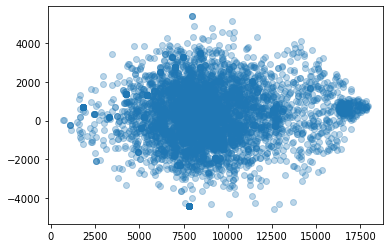

In [24]:
plt.scatter(X[:,0],X[:,1],alpha=0.3)

In [31]:
import pickle
with open("restaurants_knn.pkl",'wb') as f:
    pickle.dump([distances,indecies],f)

In [32]:

with open("restaurants_knn.pkl",'rb') as f:
    model = pickle.load(f)

In [33]:
distances,indecies = model